In [32]:
!pip install wordcloud nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.4 MB/s eta 0:00:00


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk



In [63]:
df = pd.read_csv(r"C:\Users\dtafm\OneDrive\Desktop\data.science\danielpy\fellowshipPy\trailComments.csv", encoding ="latin-1")

In [64]:
df.head()

,text,author,date,stars,trail,source
0,\n It was my girlfriend and mine first-time ex...,Ron Atkinson,"March 6, 2020",5.0,Unknown,https://www.singletracks.com/bike-trails/balm-...
1,"\n Great trail, fun, ups & downs, roots, rocks...",LowDawg,"March 8, 2019",5.0,Spider Berm,https://www.singletracks.com/bike-trails/balm-...
2,\n I've been riding Alafia and Santos once or ...,Superfly Lee,"February 26, 2019",5.0,Unknown,https://www.singletracks.com/bike-trails/balm-...
3,\n Well designed technical trails,kriscira,"January 26, 2019",5.0,Unknown,https://www.singletracks.com/bike-trails/balm-...
4,\n Balm is a million times better than Alifia....,Tim Russell,"May 18, 2018",5.0,Unknown,https://www.singletracks.com/bike-trails/balm-...


In [65]:
low_rating = df[df["stars"] <= 3]

high_rating = df[df["stars"] > 3]

In [67]:


# Download NLTK stopwords (only need to run this once)
nltk.download('stopwords')

# Custom stopwords list
custom_stopwords = {"trail","trails", "bike", "mountain", "reviews"}

# Combine English stopwords with custom stopwords
all_stopwords = list(nltk_stopwords.union(custom_stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtafm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


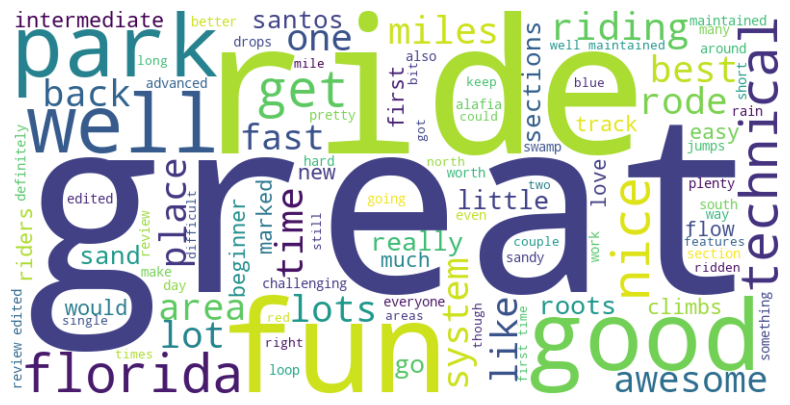


Top 20 terms:
great: 174.4281
ride: 154.8250
fun: 133.9702
good: 109.3865
park: 95.6846
well: 88.4850
florida: 84.5591
technical: 81.0229
nice: 80.2103
get: 78.2676
riding: 76.3014
time: 75.9919
one: 72.3340
miles: 71.4756
rode: 68.9681
system: 68.4911
area: 66.7756
best: 66.5100
back: 65.4304
place: 65.1528


In [68]:
# Step 1: Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words= all_stopwords, max_features=100, ngram_range=(1, 2), max_df = .95)
X = vectorizer.fit_transform(df['text'])

# Step 2: Get the top TF-IDF scores for words
terms = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
term_scores = dict(zip(terms, tfidf_scores))

# Step 3: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_scores)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Print top 20 terms (optional)
sorted_terms = sorted(term_scores.items(), key=lambda x: x[1], reverse=True)
print("\nTop 20 terms:")
for term, score in sorted_terms[:20]:
    print(f"{term}: {score:.4f}")

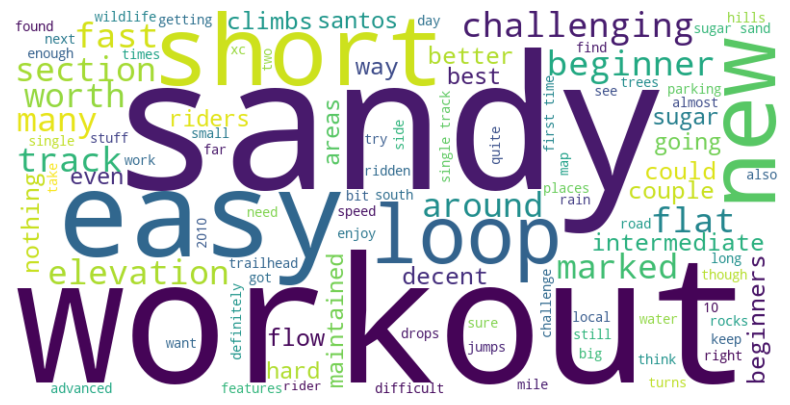


Top 20 terms:
sandy: 13.6530
workout: 12.1280
easy: 12.1240
short: 11.4179
new: 10.9977
loop: 10.5827
challenging: 10.4966
beginner: 10.4623
track: 10.2885
fast: 10.1709
flat: 10.1146
section: 9.7498
marked: 9.5776
elevation: 9.3489
around: 9.2976
many: 9.2577
worth: 9.2006
intermediate: 9.1716
flow: 8.9329
climbs: 8.9108


In [75]:
# Step 1: Apply TF-IDF


vectorizer = TfidfVectorizer(stop_words= all_stopwords, max_features=100, ngram_range=(1, 2), max_df = .1)
X = vectorizer.fit_transform(low_rating['text'])

# Step 2: Get the top TF-IDF scores for words
terms = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
term_scores = dict(zip(terms, tfidf_scores))


# Step 3: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_scores)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Print top 20 terms (optional)
sorted_terms = sorted(term_scores.items(), key=lambda x: x[1], reverse=True)
print("\nTop 20 terms:")
for term, score in sorted_terms[:20]:
    print(f"{term}: {score:.4f}")

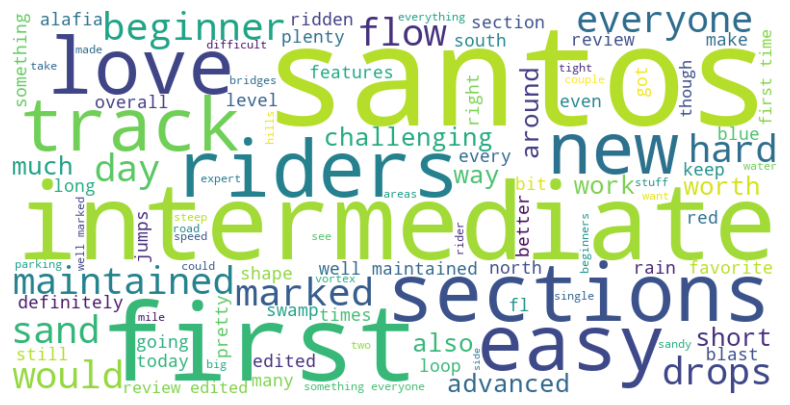


Top 20 terms:
santos: 53.1348
intermediate: 48.5615
first: 48.4960
sections: 48.2315
riders: 46.8427
easy: 46.1834
love: 46.0819
track: 45.4307
new: 44.5415
beginner: 44.3677
marked: 44.0528
flow: 42.8850
maintained: 42.8666
day: 42.1476
hard: 41.3688
everyone: 41.3595
drops: 41.1881
sand: 40.9767
would: 40.0102
challenging: 39.1104


In [74]:
# Step 1: Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words= all_stopwords, max_features=100, ngram_range=(1, 2), max_df = .1)
X = vectorizer.fit_transform(high_rating['text'])

# Step 2: Get the top TF-IDF scores for words
terms = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
term_scores = dict(zip(terms, tfidf_scores))

# Step 3: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_scores)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Print top 20 terms (optional)
sorted_terms = sorted(term_scores.items(), key=lambda x: x[1], reverse=True)
print("\nTop 20 terms:")
for term, score in sorted_terms[:20]:
    print(f"{term}: {score:.4f}")